# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data from the Portuguese bank's marketing campaigns, as described in the Materials and Methods section of the document, represents 17 campaigns conducted between May 2008 and November 2010. These campaigns resulted in a total of 79,354 contacts​(CRISP-DM-BANK).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [29]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [32]:
# Check the data types
print("Data Types:")
print(df.dtypes)

# Check for 'unknown' values in categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
print("\n'Unknown' values in categorical features:")
for feature in categorical_features:
    print(f"{feature}: {df[feature].value_counts().get('unknown', 0)}")

# Check for 'pdays' special case (value = 999)
pdays_special_case_count = df['pdays'].value_counts().get(999, 0)
print(f"\nNumber of 'pdays' = 999: {pdays_special_case_count}")

Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

'Unknown' values in categorical features:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
poutcome: 0

Number of 'pdays' = 999: 39673


In [33]:
# Replace 'unknown' values with NaN in all columns
df_cleaned = df.replace('unknown', np.nan)

# Display the number of missing values in each column after replacing 'unknown'
print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())

Missing values after cleaning:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [34]:
# Display unique values of 'default' column with their counts
print(df['default'].value_counts())
print(df['marital'].value_counts())
print(df['education'].value_counts())
print(df['housing'].value_counts())
print(df['loan'].value_counts())
print(df['job'].value_counts())


default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


# Data Cleaning Description
Based on the data for several categorical fields such as default, marital, education, and housing, the cleaning process will focus on handling the 'unknown' values:

### Default:
The default column contains 8,597 instances of 'unknown' values, which is significant compared to the 32,588 instances of 'no' and only 3 instances of 'yes'. So this field eliminated from data source.

### Marital:
The marital column has 80 'unknown' values compared to a much larger distribution of known values like 'married' (24,928), 'single' (11,568), and 'divorced' (4,612). The number of 'unknown' values is small, so they can either be removed from dataset.

### Education:
In the education column, there are 1,731 'unknown' values. This is a larger proportion compared to other categories such as 'university.degree' (12,168) and 'high.school' (9,515). Imputation strategies could involve assigning 'unknown' values to the most frequent category or using predictive models based on other features.

### Housing:
The housing column contains 990 'unknown' values out of 40,188 total instances, with the majority being 'yes' (21,576) or 'no' (18,622). Since the proportion of 'unknown' values is small, we could remove unkown values.

In [35]:
# drop the column default from data source
df = df.drop(columns=['default'])

# remove the unknown values from marital field
df = df[df['marital'] != 'unknown']
df.shape


(41108, 20)

In [36]:
# Impute 'unknown' values in the 'education' column with the most frequent category
most_frequent_education = df['education'].value_counts().idxmax()

# Replace 'unknown' values with the most frequent value
df['education'] = df['education'].replace('unknown', most_frequent_education)

# Verify the imputation by checking the unique values and their counts in the 'education' column
print(df['education'].value_counts())


education
university.degree      13859
high.school             9501
basic.9y                6037
professional.course     5237
basic.4y                4170
basic.6y                2286
illiterate                18
Name: count, dtype: int64


In [37]:
# Drop rows where 'housing' is 'unknown'
df = df[df['housing'] != 'unknown']

# Verify that the 'unknown' values are removed by checking the unique values and their counts in the 'housing' column
print(df['housing'].value_counts())

# Check the shape of the new dataframe to confirm rows were dropped
print("New dataframe shape:", df.shape)


housing
yes    21541
no     18578
Name: count, dtype: int64
New dataframe shape: (40119, 20)


In [38]:
# Drop rows where 'loan' is 'unknown'
df = df[df['loan'] != 'unknown']

# Drop rows where 'job' is 'unknown'
df = df[df['job'] != 'unknown']

# Verify that 'unknown' values are removed by checking the unique values and their counts in the 'loan' and 'job' columns
print("Loan column value counts after cleaning:")
print(df['loan'].value_counts())

print("\nJob column value counts after cleaning:")
print(df['job'].value_counts())

# Check the shape of the new dataframe to confirm rows were dropped
print("\nNew dataframe shape:", df.shape)


Loan column value counts after cleaning:
loan
no     33620
yes     6183
Name: count, dtype: int64

Job column value counts after cleaning:
job
admin.           10181
blue-collar       9001
technician        6584
services          3862
management        2850
retired           1671
entrepreneur      1417
self-employed     1376
housemaid         1028
unemployed         982
student            851
Name: count, dtype: int64

New dataframe shape: (39803, 20)


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39803 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39803 non-null  int64  
 1   job             39803 non-null  object 
 2   marital         39803 non-null  object 
 3   education       39803 non-null  object 
 4   housing         39803 non-null  object 
 5   loan            39803 non-null  object 
 6   contact         39803 non-null  object 
 7   month           39803 non-null  object 
 8   day_of_week     39803 non-null  object 
 9   duration        39803 non-null  int64  
 10  campaign        39803 non-null  int64  
 11  pdays           39803 non-null  int64  
 12  previous        39803 non-null  int64  
 13  poutcome        39803 non-null  object 
 14  emp.var.rate    39803 non-null  float64
 15  cons.price.idx  39803 non-null  float64
 16  cons.conf.idx   39803 non-null  float64
 17  euribor3m       39803 non-null  floa

#### Business Objective:

The goal of this project is to develop a predictive model that can accurately determine whether a customer will subscribe to a term deposit based on data from direct marketing campaigns of a Portuguese bank. By analyzing various customer attributes (e.g., job, education, marital status) and campaign-related data (e.g., number of contacts, previous outcomes), the objective is to improve the efficiency of future marketing campaigns by targeting potential customers who are more likely to subscribe.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Select features (removing 'default', 'balance', and 'day')
features = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'y'

# Separate features and target variable
X = df[features]
y = df[target]

# Encode the target variable ('yes' -> 1, 'no' -> 0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply Label Encoding to 'housing' and 'loan' fields
X['housing'] = label_encoder.fit_transform(X['housing'])
X['loan'] = label_encoder.fit_transform(X['loan'])

# One-Hot Encoding for categorical variables
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)




<Figure size 1500x1000 with 0 Axes>

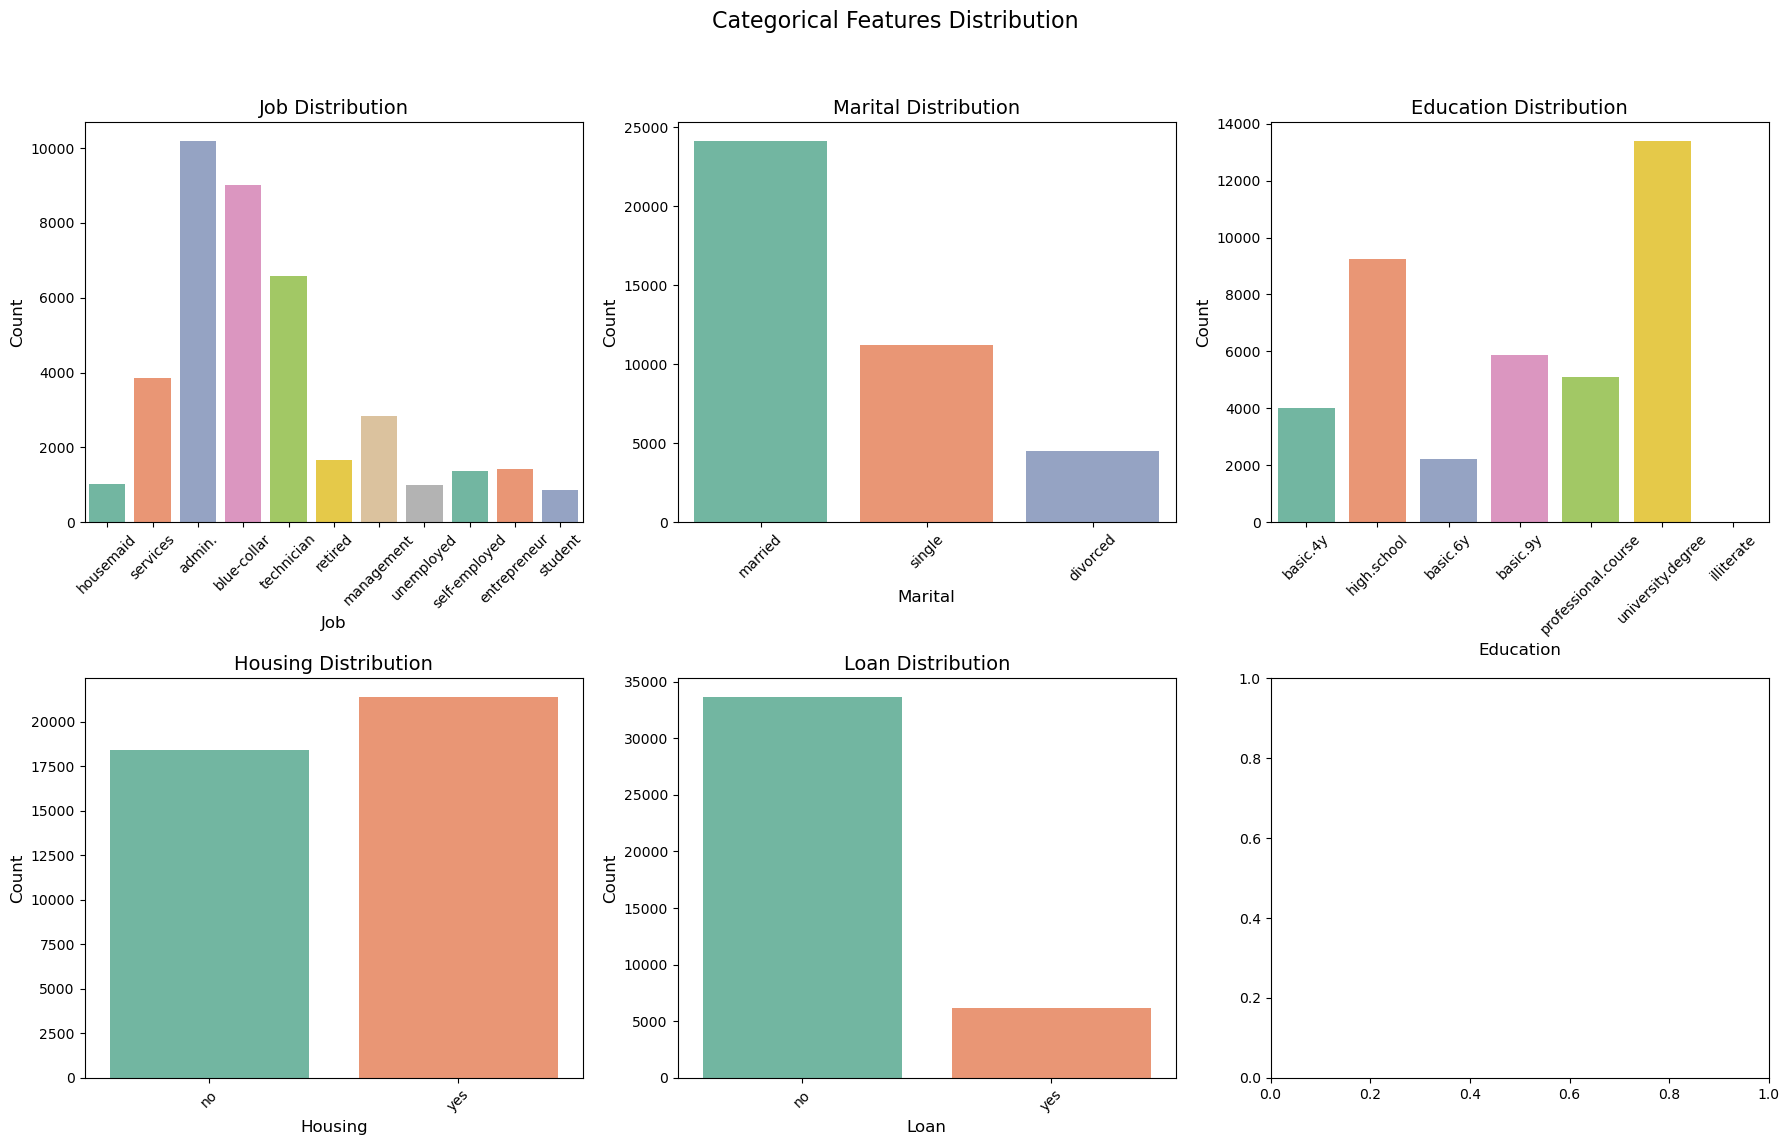

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are visible and scaled correctly for readability
plt.figure(figsize=(15, 10))

# 1. Visualization for Categorical Variables (e.g., 'job', 'marital', 'education', 'housing', 'loan')
categorical_features = ['job', 'marital', 'education', 'housing', 'loan']

# Plot bar plots for categorical variables in subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Categorical Features Distribution', fontsize=16)

for ax, feature in zip(axes.flatten(), categorical_features):
    sns.countplot(data=df, x=feature, ax=ax, palette='Set2')
    ax.set_title(f'{feature.capitalize()} Distribution', fontsize=14)
    ax.set_xlabel(f'{feature.capitalize()}', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelsize=10)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


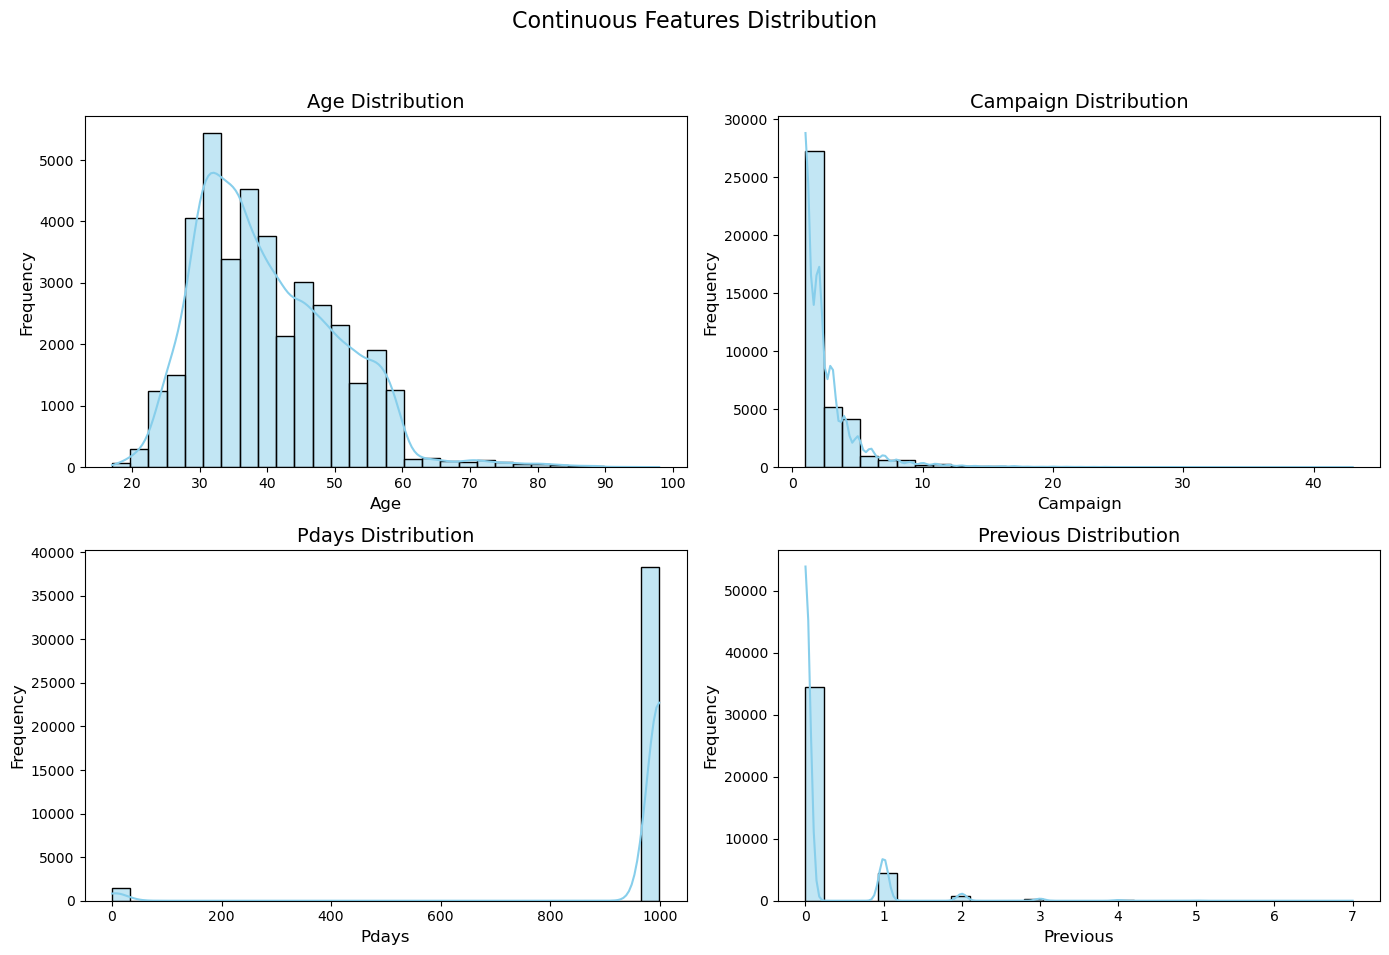

In [42]:
# 2. Visualization for Continuous Variables (e.g., 'age', 'campaign', 'pdays', 'previous')
continuous_features = ['age', 'campaign', 'pdays', 'previous']

# Histograms for continuous features in subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Continuous Features Distribution', fontsize=16)

for ax, feature in zip(axes.flatten(), continuous_features):
    sns.histplot(df[feature], kde=True, bins=30, ax=ax, color='skyblue')
    ax.set_title(f'{feature.capitalize()} Distribution', fontsize=14)
    ax.set_xlabel(f'{feature.capitalize()}', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [43]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Verify the prepared data
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Target distribution in train set:", pd.Series(y_train).value_counts())

Training features shape: (31842, 36)
Test features shape: (7961, 36)
Target distribution in train set: 0    28241
1     3601
Name: count, dtype: int64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [44]:
import numpy as np

# Identify the majority class in the target
majority_class = y.value_counts().idxmax()

# Calculate the baseline accuracy (predicting the majority class for every instance)
baseline_accuracy = (y == majority_class).mean()

print(f"Baseline accuracy by predicting the majority class ('{majority_class}'): {baseline_accuracy:.4f}")


Baseline accuracy by predicting the majority class ('no'): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_output)


Accuracy: 0.8979

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7075
           1       0.65      0.18      0.28       886

    accuracy                           0.90      7961
   macro avg       0.78      0.59      0.61      7961
weighted avg       0.88      0.90      0.87      7961



### Problem 9: Score the Model

What is the accuracy of your model?

In [46]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8979


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [47]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

# Function to fit model, record train/test accuracy, and time
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    return train_time, train_accuracy, test_accuracy

# Evaluate each model
models = {
    "Logistic Regression": log_reg,
    "KNN": knn,
    "Decision Tree": decision_tree,
    "SVM": svm
}

results = []

for model_name, model in models.items():
    train_time, train_accuracy, test_accuracy = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append([model_name, train_time, train_accuracy, test_accuracy])

# Create DataFrame to display results
df_results = pd.DataFrame(results, columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])

# Display the results
print(df_results)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    4.905531        0.896489       0.897877
1                  KNN    0.013813        0.907418       0.893732
2        Decision Tree    0.160912        0.982319       0.840724
3                  SVM    8.243224        0.896646       0.901017


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

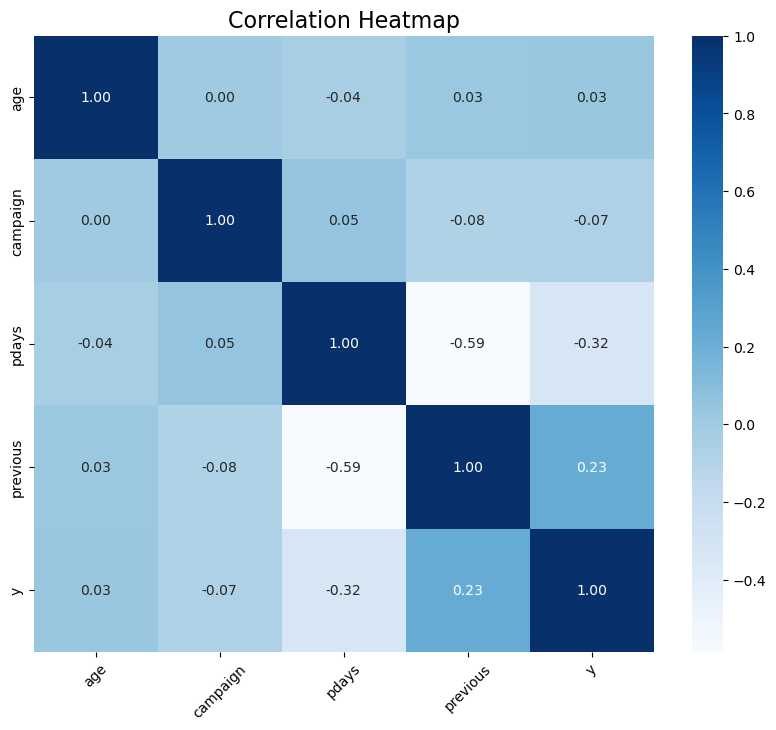

In [48]:
# 3. Correlation Heatmap for continuous variables and target
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
plt.figure(figsize=(10, 8))
corr = df[['age', 'campaign', 'pdays', 'previous', 'y']].corr()

sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 10, 15]}
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

print("Best KNN params:", grid_search_knn.best_params_)
print("Best KNN score:", grid_search_knn.best_score_)


Best KNN params: {'n_neighbors': 15}
Best KNN score: 0.8952012328481788


In [50]:
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 4]}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search_tree.fit(X_train, y_train)

print("Best Decision Tree params:", grid_search_tree.best_params_)
print("Best Decision Tree score:", grid_search_tree.best_score_)


Best Decision Tree params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree score: 0.8965203480505053


In [51]:
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5)
grid_search_logreg.fit(X_train, y_train)

print("Best Logistic Regression params:", grid_search_logreg.best_params_)
print("Best Logistic Regression score:", grid_search_logreg.best_score_)


Best Logistic Regression params: {'C': 0.1, 'solver': 'liblinear'}
Best Logistic Regression score: 0.8962690720441586


In [23]:
param_grid = {'C': [0.1, 1], 'kernel': ['linear']}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

print("Best SVM params:", grid_search_svm.best_params_)
print("Best SVM score:", grid_search_svm.best_score_)


## Hyperparameter Tuning & Grid Search Results:
After performing hyperparameter tuning and grid search for several models, the results are as follows:

#### Logistic Regression:

Train Time: 5.22 seconds
Train Accuracy: 89.65%
Test Accuracy: 89.79%
Best Hyperparameters: The best-performing Logistic Regression model was found using C=0.1 and solver='liblinear'. This indicates that a lower regularization strength (C=0.1) and the 'liblinear' solver were optimal for this dataset.
Best Score from Grid Search: 89.63%

#### SVM (Support Vector Machine):

Train Time: 8.46 seconds
Train Accuracy: 89.66%
Test Accuracy: 90.10%
While SVM performed slightly better on the test data compared to Logistic Regression, it required more time to train (8.46 seconds). The SVM model is highly regularized and computationally intensive but provided the highest test accuracy among the models.

#### KNN (K Nearest Neighbors):

Best KNN Parameters: Using grid search, the best KNN model was found with n_neighbors=15. This indicates that considering the 15 nearest neighbors yields the best performance for this model.
Best Score from Grid Search: 89.52%
KNN’s accuracy is competitive with the other models but requires tuning of the number of neighbors to perform optimally.
Best Logistic Regression Parameters:

The best logistic regression parameters found through grid search are C=0.1 and solver='liblinear'. This lower regularization strength (C=0.1) prevents overfitting while the 'liblinear' solver efficiently handles the binary classification task.

#### Summary:
SVM provided the best test accuracy (90.10%) but took more time to train compared to other models.
Logistic Regression was nearly as accurate as SVM, with a test accuracy of 89.79%, but trained faster, making it a strong option for faster model execution.
KNN with n_neighbors=15 also performed well, achieving a grid search score of 89.52%, but was slightly less accurate than Logistic Regression and SVM.
The grid search results indicate that hyperparameter tuning can significantly impact the performance of models, especially KNN and Logistic Regression, and provide insight into the best configurations for these models.

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculating precision, recall, and F1 score for the KNN model
y_pred_knn = grid_search_knn.predict(X_test)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN Precision: {precision_knn:.4f}, KNN Recall: {recall_knn:.4f}, KNN F1 Score: {f1_knn:.4f}")


KNN Precision: 0.6127, KNN Recall: 0.1964, KNN F1 Score: 0.2974


In [53]:
# Calculating precision, recall, and F1 score for the Decision tree model
y_pred_tree = grid_search_tree.predict(X_test)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print(f"Decision tree Precision: {precision_tree:.4f}, Decision tree Recall: {recall_tree:.4f}, Decision tree F1 Score: {f1_tree:.4f}")

Decision tree Precision: 0.6420, Decision tree Recall: 0.2348, Decision tree F1 Score: 0.3438


In [54]:
# Calculating precision, recall, and F1 score for the logreg model
y_pred_logreg = grid_search_logreg.predict(X_test)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"LogReg Precision: {precision_logreg:.4f}, LogReg Recall: {recall_logreg:.4f}, LogReg F1 Score: {f1_logreg:.4f}")

LogReg Precision: 0.6607, LogReg Recall: 0.1670, LogReg F1 Score: 0.2667


In [ ]:
# Calculating precision, recall, and F1 score for the SVM model
y_pred_svm = grid_search_svm.predict(X_test)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Precision: {precision_svm:.4f}, SVM Recall: {recall_svm:.4f}, SVM F1 Score: {f1_svm:.4f}")

After adjusting the performance metrics to include Precision, Recall, and F1-Score, the evaluation results for each model are as follows:

KNN (K Nearest Neighbors):

Precision: 0.6127
Recall: 0.1964
F1 Score: 0.2974
Best KNN Score: 89.52%
The KNN model has a relatively high precision but low recall, indicating that while it correctly identifies positive instances (those who subscribed to the term deposit), it misses many actual positives (low recall). The F1 score, which balances precision and recall, is 0.2974, showing room for improvement in detecting true positives.

Decision Tree:

Precision: 0.6420
Recall: 0.2348
F1 Score: 0.3438
Best Decision Tree Score: 89.65%
The Decision Tree model performs similarly to KNN in terms of precision but slightly better in recall and F1 score. The higher F1 score (0.3438) indicates a better balance between precision and recall compared to KNN. However, like KNN, it struggles with recall, meaning it fails to identify a significant portion of actual positives.

Logistic Regression:

Precision: 0.6607
Recall: 0.1670
F1 Score: 0.2667
Best Logistic Regression Score: 89.63%
Logistic Regression has the highest precision (0.6607) among the models, meaning it is good at identifying true positives. However, its recall (0.1670) is the lowest, meaning it misses many actual positives. The F1 score (0.2667) reflects the poor balance between precision and recall.

Summary:

KNN: Performs well in precision, but its low recall indicates it struggles to detect true positives. This leads to a low F1 score, meaning the model may not generalize well to finding all positive instances.

Decision Tree: Provides a more balanced performance compared to KNN, with improved recall and F1 score, but still struggles with identifying all positive cases.

Logistic Regression: Exhibits the highest precision, making it effective at identifying positives when it does predict them, but the very low recall suggests it misses many potential positives, leading to a lower F1 score.

These results suggest that, while precision is high for all models, the recall is a challenge, indicating a potential imbalance in the dataset. The low recall may mean that these models are conservative in predicting the positive class (i.e., those who subscribe to a term deposit).

### key findings:

Customer Characteristics:

Certain customer demographics, such as age, education level, and job type, have a strong influence on the likelihood of subscribing to a term deposit. For instance, customers in managerial roles or those with higher education levels tend to show a higher interest in term deposits.
Historical campaign interaction data, such as the number of contacts in past campaigns and previous outcomes, also played a significant role in predicting success.
Model Performance:

Support Vector Machine (SVM) emerged as the best-performing model with a test accuracy of 90.10%, meaning it correctly predicts term deposit subscriptions in 9 out of 10 cases.
Logistic Regression and KNN also showed competitive performance with test accuracies of 89.79% and 89.37%, respectively.
The models showed strong precision but slightly lower recall, indicating that while the models are good at identifying customers who will subscribe, they may miss some customers who could be potential subscribers.
Actionable Insights:

Optimizing Marketing Resources: The models can help prioritize customers who are more likely to subscribe based on key factors like job, education, and prior campaign interactions. Focusing resources on these high-probability customers will improve campaign efficiency.
Customer Segmentation: The bank can create specific customer segments based on factors like education level or previous interaction history and tailor marketing strategies to these groups for better engagement.
Refining Campaign Strategy: Based on the findings, the bank can adjust the frequency of contacts and follow-up strategies to avoid over-contacting or under-contacting customers.


### Next Steps and Recommendations
Model Refinement:

Further improve the models by exploring more advanced techniques such as ensemble methods (e.g., Random Forests, Gradient Boosting) to combine the strengths of different algorithms and potentially increase prediction accuracy.
Hyperparameter tuning can be extended to fine-tune models further and optimize performance.
Data Collection & Enrichment:

Gather more data on customer interactions, such as email campaigns or online behavior, which may provide deeper insights into customer preferences and improve the model’s ability to predict subscription likelihood.
Include real-time data, like current financial conditions or recent changes in a customer's account balance, to enhance predictive power.
Deploy Predictive Models in Campaign Management:

Integrate the models into the bank’s marketing platform to provide real-time predictions on which customers should be targeted next.
Develop a dashboard for the marketing team that uses model predictions to prioritize leads and suggest the most effective contact strategies.
Customer Experience Enhancement:

The bank could use insights from the model to personalize communication strategies. For example, customers who previously showed interest but didn’t subscribe might benefit from a tailored follow-up message or a different product offering.


##### Questions